In [1]:
import numpy as np
import pandas as pd
import pickle
import scipy
from statannotations.Annotator import Annotator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
all_corr_sep_sequences = np.load('../FILES/all_corr_sep_sequences_3.npy',allow_pickle=True)

In [3]:
all_below_thresh = []
for seq in range(4):
    all_corr_sep = np.array(all_corr_sep_sequences[seq])
    below_thresh= 19*np.ones((len(all_corr_sep_sequences[0]),26))
    thresh_cross = 0.3
    for rep in range(len(all_corr_sep)):
        corr_sep_curr = all_corr_sep[rep]
        for i in range(np.shape(corr_sep_curr)[1]):
            if len(np.where(corr_sep_curr[:,i]<thresh_cross)[0])>0:
                below_thresh[rep, i] = np.where(corr_sep_curr[:,i]<thresh_cross)[0][0]
    all_below_thresh.append(below_thresh)

In [5]:
n_iter = 10
all_titles= ['visual then same reward','visual then different reward', 'same reward then visual','different reward then visual' ]
for curr_fig in range(0, 4):
    all_loc = []
    when_cross = []
    below_thresh = np.column_stack((all_below_thresh[curr_fig][:,1], all_below_thresh[curr_fig][:,6]))##all_below_thresh[curr_fig][:,1]
    for i in range(len(below_thresh)):
        for j in range(len(below_thresh[0])):
            when_cross.append(below_thresh[i,j]*n_iter)
            all_loc.append(j)
    if curr_fig == 0:
        Xplot = pd.DataFrame(np.array([when_cross, all_loc, [curr_fig]*len(when_cross)]).T)
    else:
        Xplot = pd.concat([Xplot,pd.DataFrame(np.array([when_cross, all_loc, [curr_fig]*len(when_cross)]).T)],ignore_index=True)


Text(0, 0.5, 'Number of iterations to decorrelate')

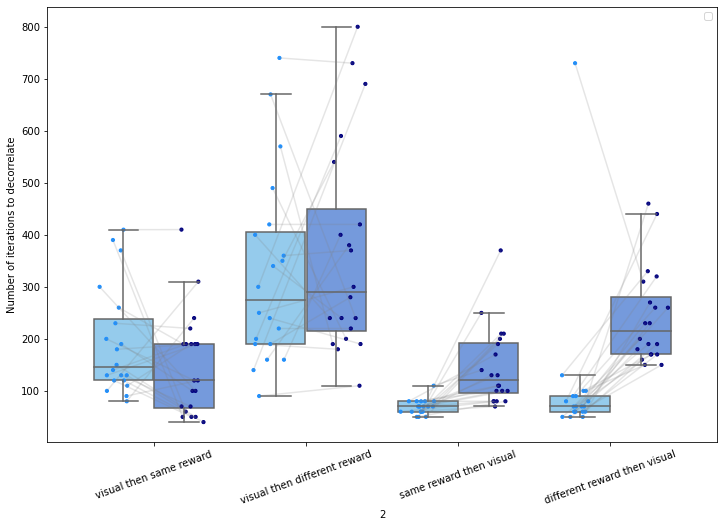

In [14]:
all_below_thresh = np.array(all_below_thresh)

fig, axs = plt.subplots(1, figsize = (12,8))
xloc = -0.24
all_below_thresh_jitter = (all_below_thresh*n_iter) + np.random.normal(loc=0, scale=0.05, size=np.shape(all_below_thresh))
ax=sb.boxplot(x = 2, y = 0, data =Xplot,hue = 1,palette =[ 'lightskyblue', 'cornflowerblue'], ax = axs, showfliers= False)
for seq in range(0,4):
    for i in range(0,20):
        jitterx1 = np.random.normal(loc=0, scale=0.05)
        jitterx2 = np.random.normal(loc=0, scale=0.05)
        ##axs.plot([xloc + jitterx1,xloc+0.5 + jitterx2],[np.mean(all_below_thresh_jitter[seq][i,1]), np.mean(all_below_thresh_jitter[seq][i,6])], color = 'grey', alpha = 0.2)
        ##axs.scatter([xloc + jitterx1,xloc+0.5 + jitterx2],[np.mean(all_below_thresh_jitter[seq][i,1]), np.mean(all_below_thresh_jitter[seq][i,6])], color = ['purple','green'],s= 10)
        axs.plot([xloc + jitterx1,xloc+0.5 + jitterx2],[all_below_thresh_jitter[seq][i,1], all_below_thresh_jitter[seq][i,6]], color = 'grey', alpha = 0.2)
        axs.scatter([xloc + jitterx1,xloc+0.5 + jitterx2],[all_below_thresh_jitter[seq][i,1],all_below_thresh_jitter[seq][i,6]], color = ['dodgerblue', 'navy'],s= 10)
    xloc= xloc + 1##0.99

plt.legend([])
axs.set_xticklabels(all_titles, rotation = 20)
axs.set_ylabel('Number of iterations to decorrelate')
##plt.savefig('decorrelation_time_diff_sequence_all_in_one_connected.pdf', format='pdf', dpi=500)